In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
#import tsfresh

In [3]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [4]:
sns.set_context('poster')

In [5]:
ppallete = "BuGn"
porder = ['MIT9313', 'Natl2A', 'C9B', 'MIT9312', 'MED4']
pedge = 'green'
apallete = "Oranges"
aorder = ['1A3', 'DE', 'DE1', 'ATCC', 'BS11']
aedge='orange'              

In [6]:
df = pd.read_pickle('CCPA.pkl.gz')

In [7]:
dfc = df.loc[(df.experiment.isin(['e3', 'e4','e5', 'e6'])) & (df.culture == 'Co_Culture')]

In [8]:
dfw = df.loc[(df.experiment.isin(['e1','e3', 'e4','e5', 'e6'])) # & (df.culture == 'Co_Culture')
            ]

# Compare Models

In [50]:
# compare models based on different experiment features
# value_col, 

value_col_list = ['FL', 'logFL', 'cumsumFL', 'cumsumlogFL']
#, 'zscoreFL', 'rateFL', 'ratelogFL']
resample_period_list = [None, '1d', '3d', '5d']
y_col_list = ['PRO', 'ALT', 'PRO_ALT']
cumsummode_list = [False, True]

In [51]:
def compare_models(df, value_col, resample_period_list, y_col_list, cumsummode_list, repetitions=10):
    # resample first
    stats_list = []
    for resample_period in resample_period_list:
        if resample_period is not None:
            d = cp.resample_df(df, value_col=value_col, period=resample_period)
        else:
            d = df
        metadf = cp.get_meta(d, value_col=value_col)
        for cumsummode in cumsummode_list:
            #print(resample_period, value_col, cumsummode)
            X = cp.experiments2X(d, value_col=value_col, cumsummode=cumsummode)
            
            resample_str = '_' + resample_period if resample_period is not None else ''
            cumsummode_str = '_cumsum' if cumsummode else ''
            for y_col in y_col_list:
                modelname = f'{y_col}_{value_col}{resample_str}{cumsummode_str}'
                for i in range(repetitions):
                    clf, res, _ = cp.ml(X=X, metadf=metadf, modelname=modelname, y_col=y_col)
                    res['value_col'] = value_col
                    res['resample_period'] = resample_period
                    res['y_col'] = y_col
                    res['cumsum'] = cumsummode
                    stats_list.append(res)
    return stats_list
            

In [52]:
value_col_list

['FL', 'logFL', 'cumsumFL', 'cumsumlogFL']

In [53]:
stats_list = []
for i in value_col_list:
    res = compare_models(dfw, value_col=i, 
               resample_period_list=resample_period_list, 
               y_col_list=y_col_list, 
               cumsummode_list=cumsummode_list,
               repetitions=1)
    stats_list.extend(res)


PRO_FL
train score 1.0
oob score 0.8263665594855305
ALT_FL


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.5755627009646302
PRO_ALT_FL


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.5305466237942122


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_cumsum
train score 0.9967845659163987
oob score 0.7266881028938906
ALT_FL_cumsum
train score 1.0
oob score 0.4533762057877814
PRO_ALT_FL_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.3858520900321543


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_FL_1d
train score 1.0
oob score 0.8263665594855305
ALT_FL_1d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.5852090032154341
PRO_ALT_FL_1d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.5305466237942122


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_FL_1d_cumsum
train score 1.0
oob score 0.7459807073954984
ALT_FL_1d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.43729903536977494
PRO_ALT_FL_1d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4340836012861736


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_FL_3d
train score 1.0
oob score 0.8456591639871383


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_FL_3d
train score 1.0
oob score 0.5659163987138264


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_FL_3d
train score 1.0
oob score 0.5080385852090032


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_3d_cumsum
train score 1.0
oob score 0.7684887459807074
ALT_FL_3d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4212218649517685
PRO_ALT_FL_3d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4212218649517685


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d
train score 1.0
oob score 0.8360128617363344
ALT_FL_5d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.5659163987138264
PRO_ALT_FL_5d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4919614147909968


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_FL_5d_cumsum
train score 1.0
oob score 0.7041800643086816
ALT_FL_5d_cumsum
train score 1.0
oob score 0.45016077170418006
PRO_ALT_FL_5d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.42765273311897106


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_logFL
train score 1.0
oob score 0.8681672025723473
ALT_logFL


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.594855305466238
PRO_ALT_logFL


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.5594855305466238


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_cumsum
train score 1.0
oob score 0.77491961414791
ALT_logFL_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4405144694533762
PRO_ALT_logFL_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.43086816720257237


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_1d
train score 1.0
oob score 0.8456591639871383
ALT_logFL_1d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.5819935691318328
PRO_ALT_logFL_1d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.5498392282958199


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_logFL_1d_cumsum
train score 1.0
oob score 0.7813504823151125
ALT_logFL_1d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.45980707395498394
PRO_ALT_logFL_1d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.40192926045016075


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d
train score 1.0
oob score 0.8327974276527331


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_3d
train score 1.0
oob score 0.572347266881029


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_logFL_3d
train score 1.0
oob score 0.5176848874598071


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_3d_cumsum
train score 1.0
oob score 0.7717041800643086
ALT_logFL_3d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4533762057877814
PRO_ALT_logFL_3d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.42443729903536975


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d
train score 1.0
oob score 0.8520900321543409
ALT_logFL_5d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.5562700964630225
PRO_ALT_logFL_5d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.5144694533762058


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_logFL_5d_cumsum
train score 1.0
oob score 0.7877813504823151
ALT_logFL_5d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.42443729903536975
PRO_ALT_logFL_5d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.3954983922829582


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL
train score 1.0
oob score 0.7684887459807074
ALT_cumsumFL


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.45016077170418006
PRO_ALT_cumsumFL


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4533762057877814


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_cumsum
train score 1.0
oob score 0.7234726688102894
ALT_cumsumFL_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4790996784565916
PRO_ALT_cumsumFL_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.3954983922829582


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d
train score 1.0
oob score 0.7877813504823151
ALT_cumsumFL_1d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4887459807073955
PRO_ALT_cumsumFL_1d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.45980707395498394


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_1d_cumsum
train score 1.0
oob score 0.7363344051446945
ALT_cumsumFL_1d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.43086816720257237
PRO_ALT_cumsumFL_1d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4180064308681672


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d
train score 1.0
oob score 0.7395498392282959


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 

C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.0
oob score 0.44694533762057875
PRO_ALT_cumsumFL_3d
train score 1.0
oob score 0.43086816720257237


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_3d_cumsum
train score 1.0
oob score 0.7331189710610932


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.40514469453376206


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_3d_cumsum
train score 1.0
oob score 0.40192926045016075


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d
train score 1.0
oob score 0.7395498392282959
ALT_cumsumFL_5d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.42765273311897106
PRO_ALT_cumsumFL_5d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.36012861736334406


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumFL_5d_cumsum
train score 1.0
oob score 0.7170418006430869
ALT_cumsumFL_5d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4340836012861736
PRO_ALT_cumsumFL_5d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.3440514469453376


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL
train score 1.0
oob score 0.7942122186495176
ALT_cumsumlogFL


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4533762057877814
PRO_ALT_cumsumlogFL


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4437299035369775


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 1.0
oob score 0.7491961414790996
ALT_cumsumlogFL_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.41479099678456594
PRO_ALT_cumsumlogFL_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.37942122186495175


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d
train score 1.0
oob score 0.7652733118971061
ALT_cumsumlogFL_1d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.42765273311897106
PRO_ALT_cumsumlogFL_1d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4340836012861736


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_1d_cumsum
train score 1.0
oob score 0.7427652733118971
ALT_cumsumlogFL_1d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4115755627009646
PRO_ALT_cumsumlogFL_1d_cumsum


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.36977491961414793


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_3d
train score 1.0
oob score 0.8006430868167203


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d
train score 1.0
oob score 0.43729903536977494
PRO_ALT_cumsumlogFL_3d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4180064308681672


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


PRO_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.752411575562701


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.42443729903536975


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_3d_cumsum
train score 1.0
oob score 0.3858520900321543


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d
train score 1.0
oob score 0.7942122186495176
ALT_cumsumlogFL_5d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.45016077170418006
PRO_ALT_cumsumlogFL_5d


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train score 1.0
oob score 0.4340836012861736


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.7620578778135049


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.40836012861736337


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d_cumsum
train score 1.0
oob score 0.3954983922829582


C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Osnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
len(stats_list)

In [ ]:
stats_df = pd.DataFrame.from_records(stats_list)

In [ ]:
stats_df.describe()

In [ ]:
sns.catplot(data=stats_df, x='model', y='oob_score', aspect=10, height=5,
           kind='box')

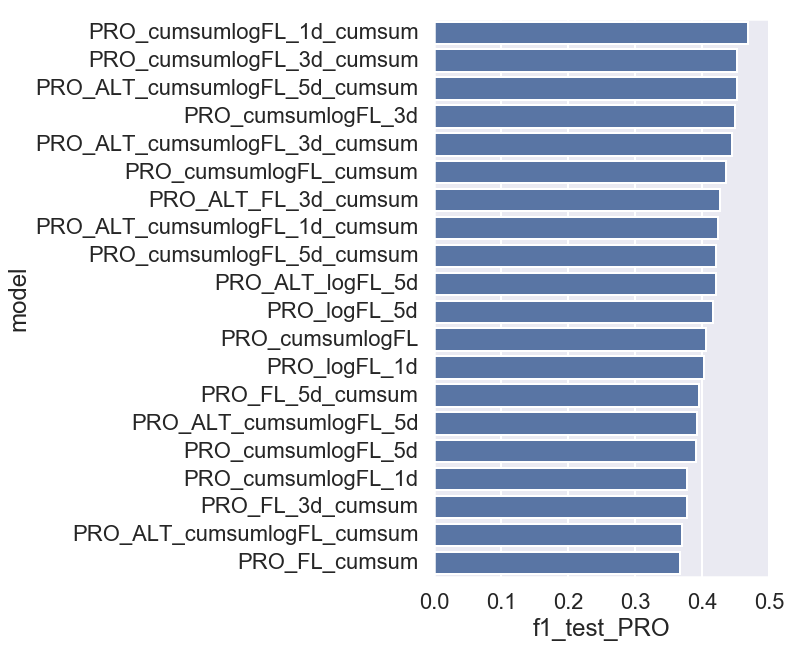

In [55]:
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(x="f1_test_PRO", y="model", data=stats_df.sort_values(by="f1_test_PRO").nlargest(columns="f1_test_PRO", n=20),
            label="Total", color="b")

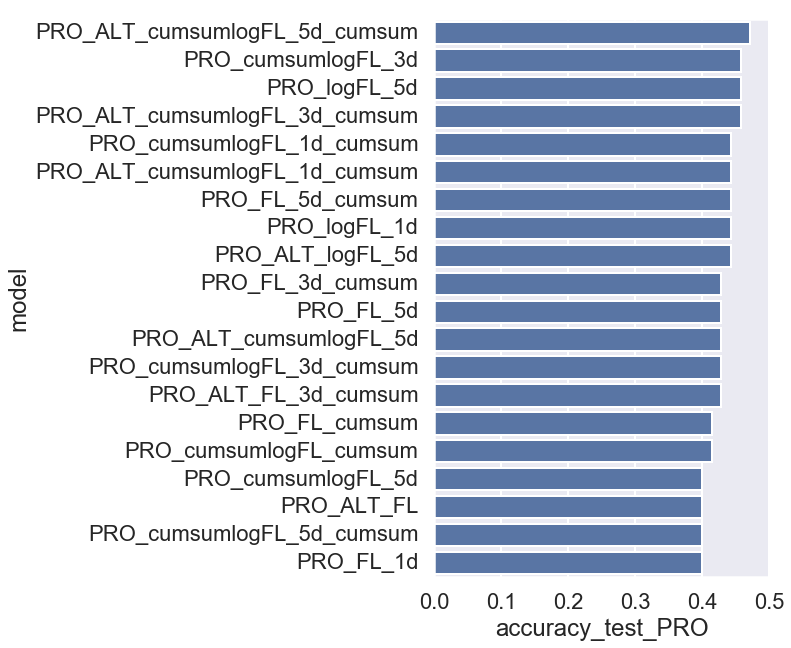

In [56]:
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(x="accuracy_test_PRO", y="model", data=stats_df.sort_values(by="accuracy_test_PRO").nlargest(columns="accuracy_test_PRO", n=20),
            label="Total", color="b")

In [42]:

stats_df.sort_values(by="f1_test_PRO").nlargest(columns="f1_test_PRO", n=15)


,accuracy_test,accuracy_test_PRO,accuracy_train,accuracy_train_PRO,f1_test,f1_test_PRO,f1_train,f1_train_PRO,model,oob_score,...,precision_train,precision_train_PRO,recall_test,recall_test_PRO,recall_train,recall_train_PRO,support_test,support_test_PRO,support_train,support_train_PRO
81,0.442857,0.442857,1.0,1.0,0.467579,0.467579,1.0,1.0,PRO_cumsumlogFL_1d_cumsum,0.765273,...,1.0,1.0,0.442857,0.442857,1.0,1.0,None,None,None,None
87,0.428571,0.428571,1.0,1.0,0.451324,0.451324,1.0,1.0,PRO_cumsumlogFL_3d_cumsum,0.752412,...,1.0,1.0,0.428571,0.428571,1.0,1.0,None,None,None,None
95,0.171429,0.471429,1.0,1.0,0.128123,0.451274,1.0,1.0,PRO_ALT_cumsumlogFL_5d_cumsum,0.372990,...,1.0,1.0,0.171429,0.471429,1.0,1.0,None,None,None,None
84,0.457143,0.457143,1.0,1.0,0.449475,0.449475,1.0,1.0,PRO_cumsumlogFL_3d,0.800643,...,1.0,1.0,0.457143,0.457143,1.0,1.0,None,None,None,None
89,0.157143,0.457143,1.0,1.0,0.105467,0.443684,1.0,1.0,PRO_ALT_cumsumlogFL_3d_cumsum,0.389068,...,1.0,1.0,0.157143,0.457143,1.0,1.0,None,None,None,None
75,0.414286,0.414286,1.0,1.0,0.435122,0.435122,1.0,1.0,PRO_cumsumlogFL_cumsum,0.742765,...,1.0,1.0,0.414286,0.414286,1.0,1.0,None,None,None,None
17,0.157143,0.428571,1.0,1.0,0.146190,0.425817,1.0,1.0,PRO_ALT_FL_3d_cumsum,0.446945,...,1.0,1.0,0.157143,0.428571,1.0,1.0,None,None,None,None
83,0.128571,0.442857,1.0,1.0,0.091587,0.423483,1.0,1.0,PRO_ALT_cumsumlogFL_1d_cumsum,0.379421,...,1.0,1.0,0.128571,0.442857,1.0,1.0,None,None,None,None
93,0.400000,0.400000,1.0,1.0,0.421243,0.421243,1.0,1.0,PRO_cumsumlogFL_5d_cumsum,0.758842,...,1.0,1.0,0.400000,0.400000,1.0,1.0,None,None,None,None
44,0.071429,0.442857,1.0,1.0,0.056905,0.421120,1.0,1.0,PRO_ALT_logFL_5d,0.514469,...,1.0,1.0,0.071429,0.442857,1.0,1.0,None,None,None,None


Text(0.5, 0.98, 'Progress per PRO (FL)')

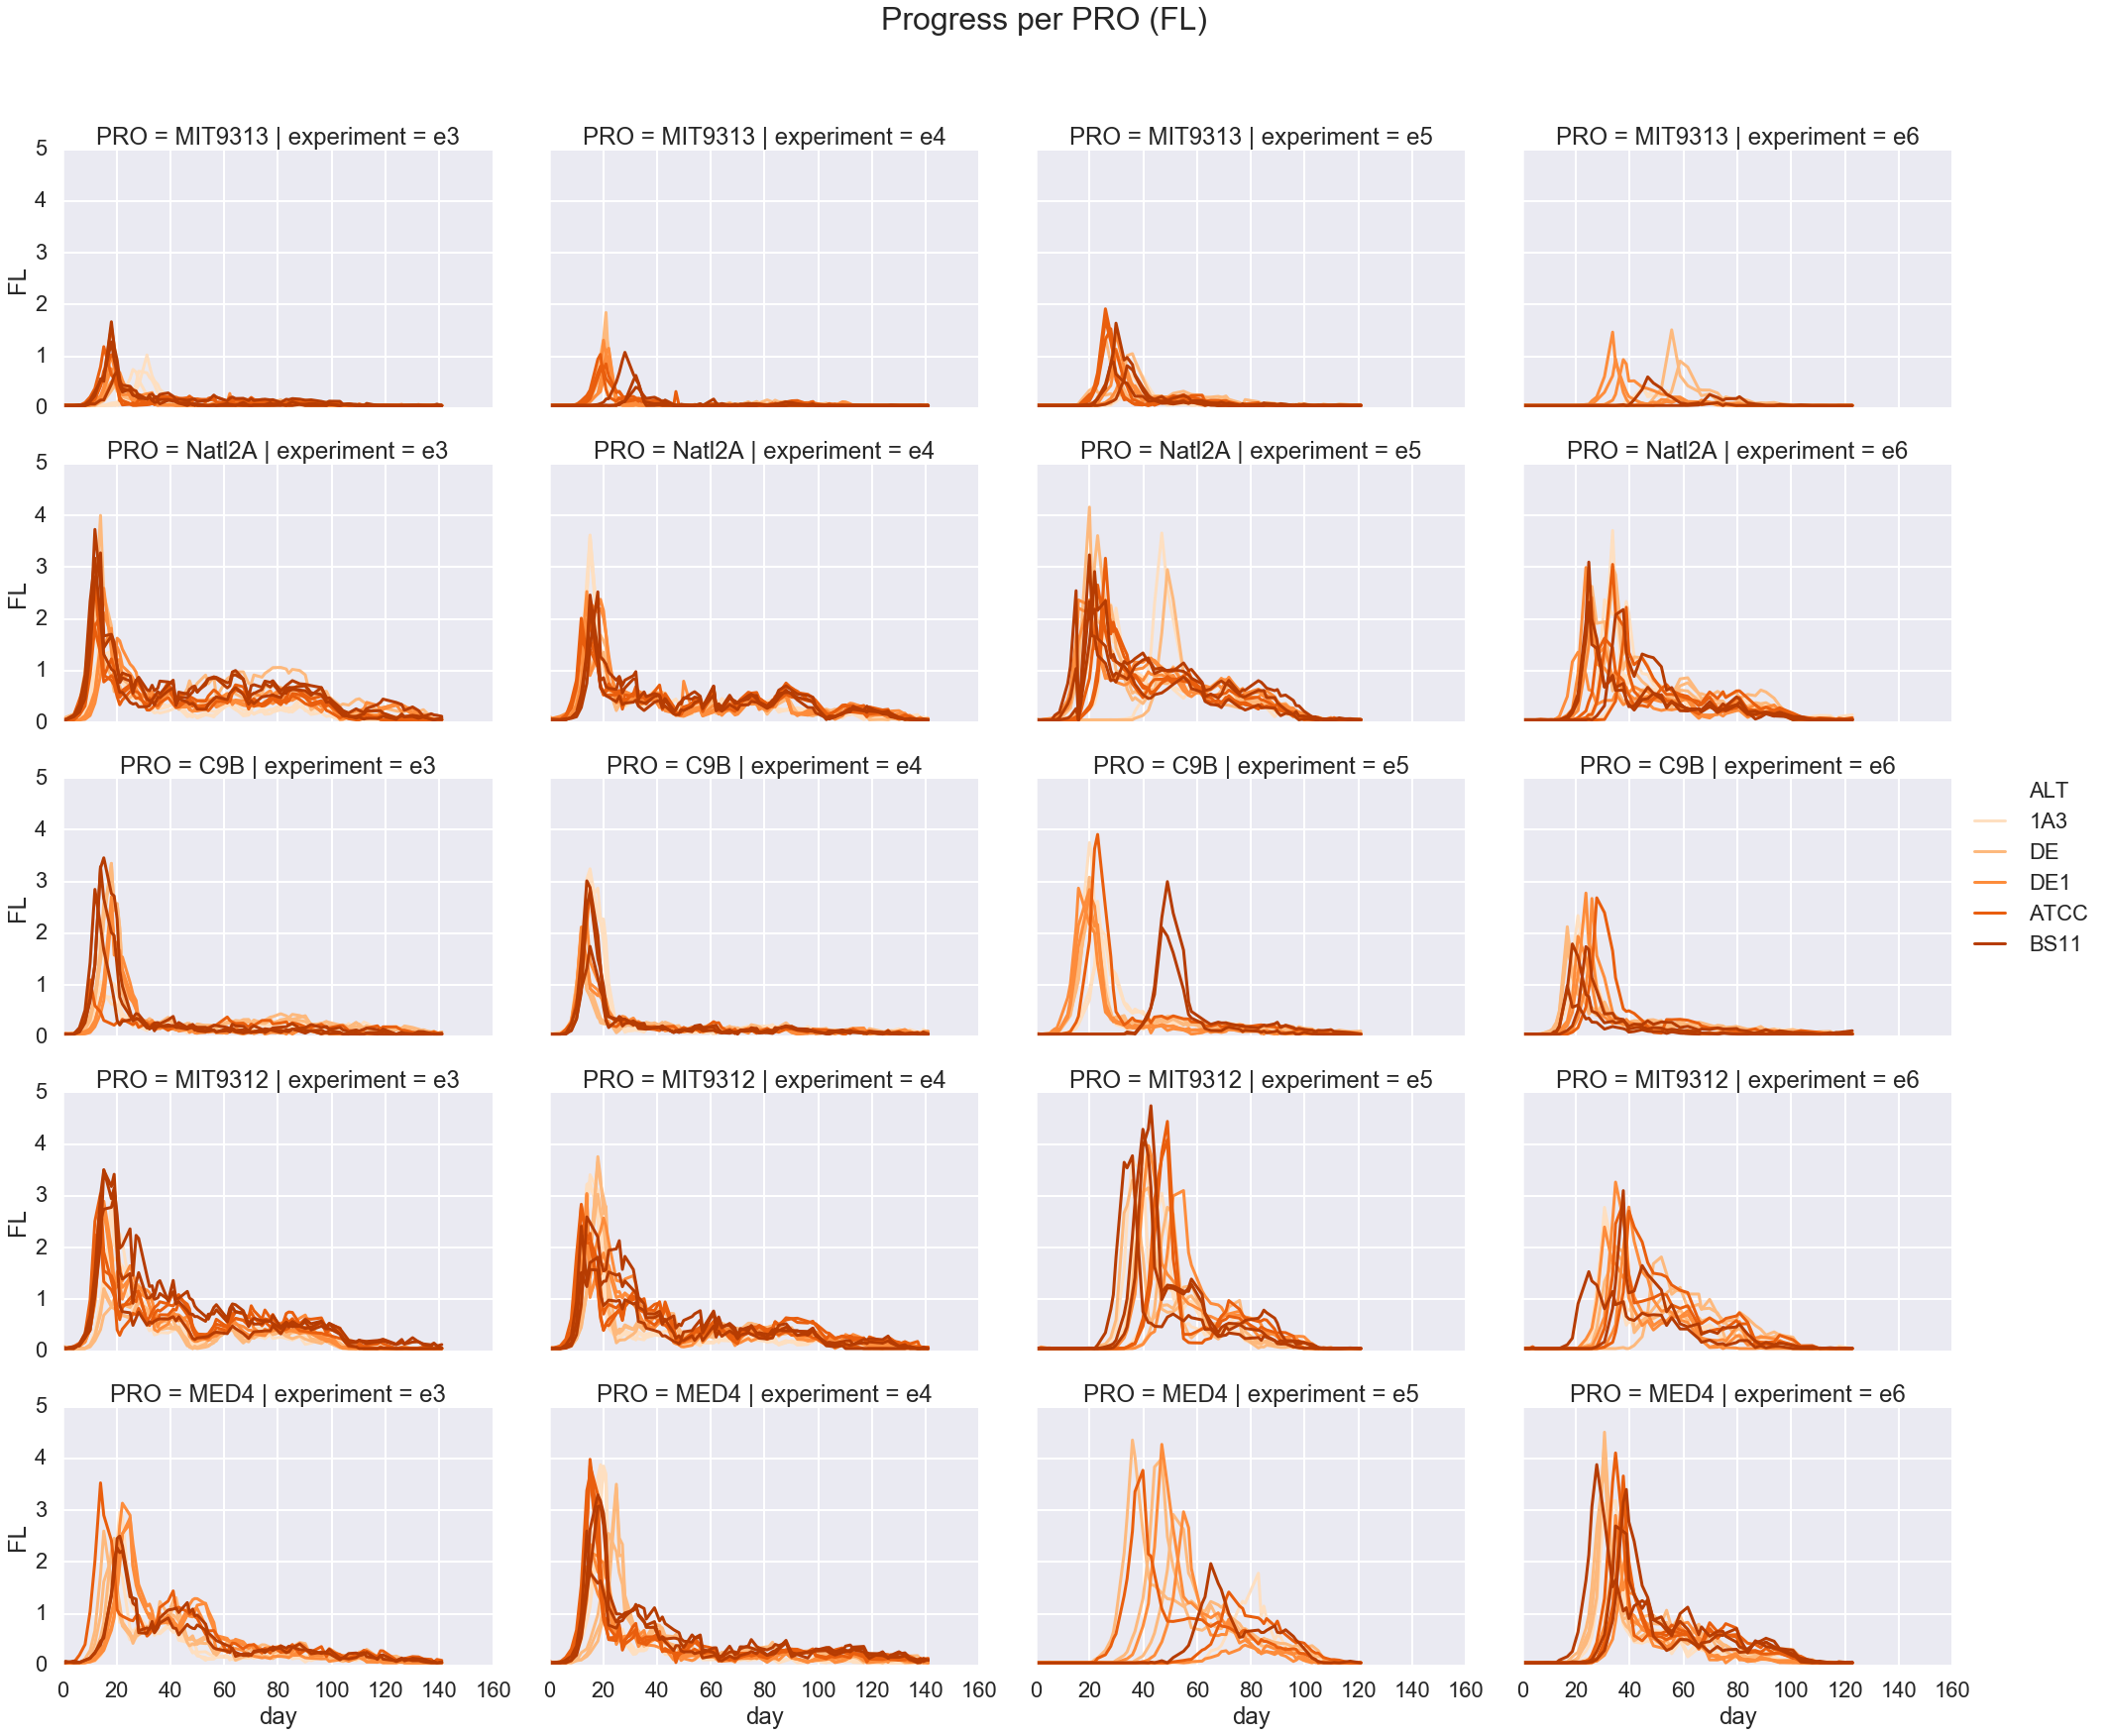

In [15]:
sns.relplot(data=dfc, x='day', y='FL', kind='line', #ci='sd',
#            col='PRO', hue='ALT', row='experiment', 
                           estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,

            palette=apallete, hue_order=aorder,
            aspect=1.4
           )
#plt.title("Progress per PRO")
plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per PRO (FL)", fontsize=32)


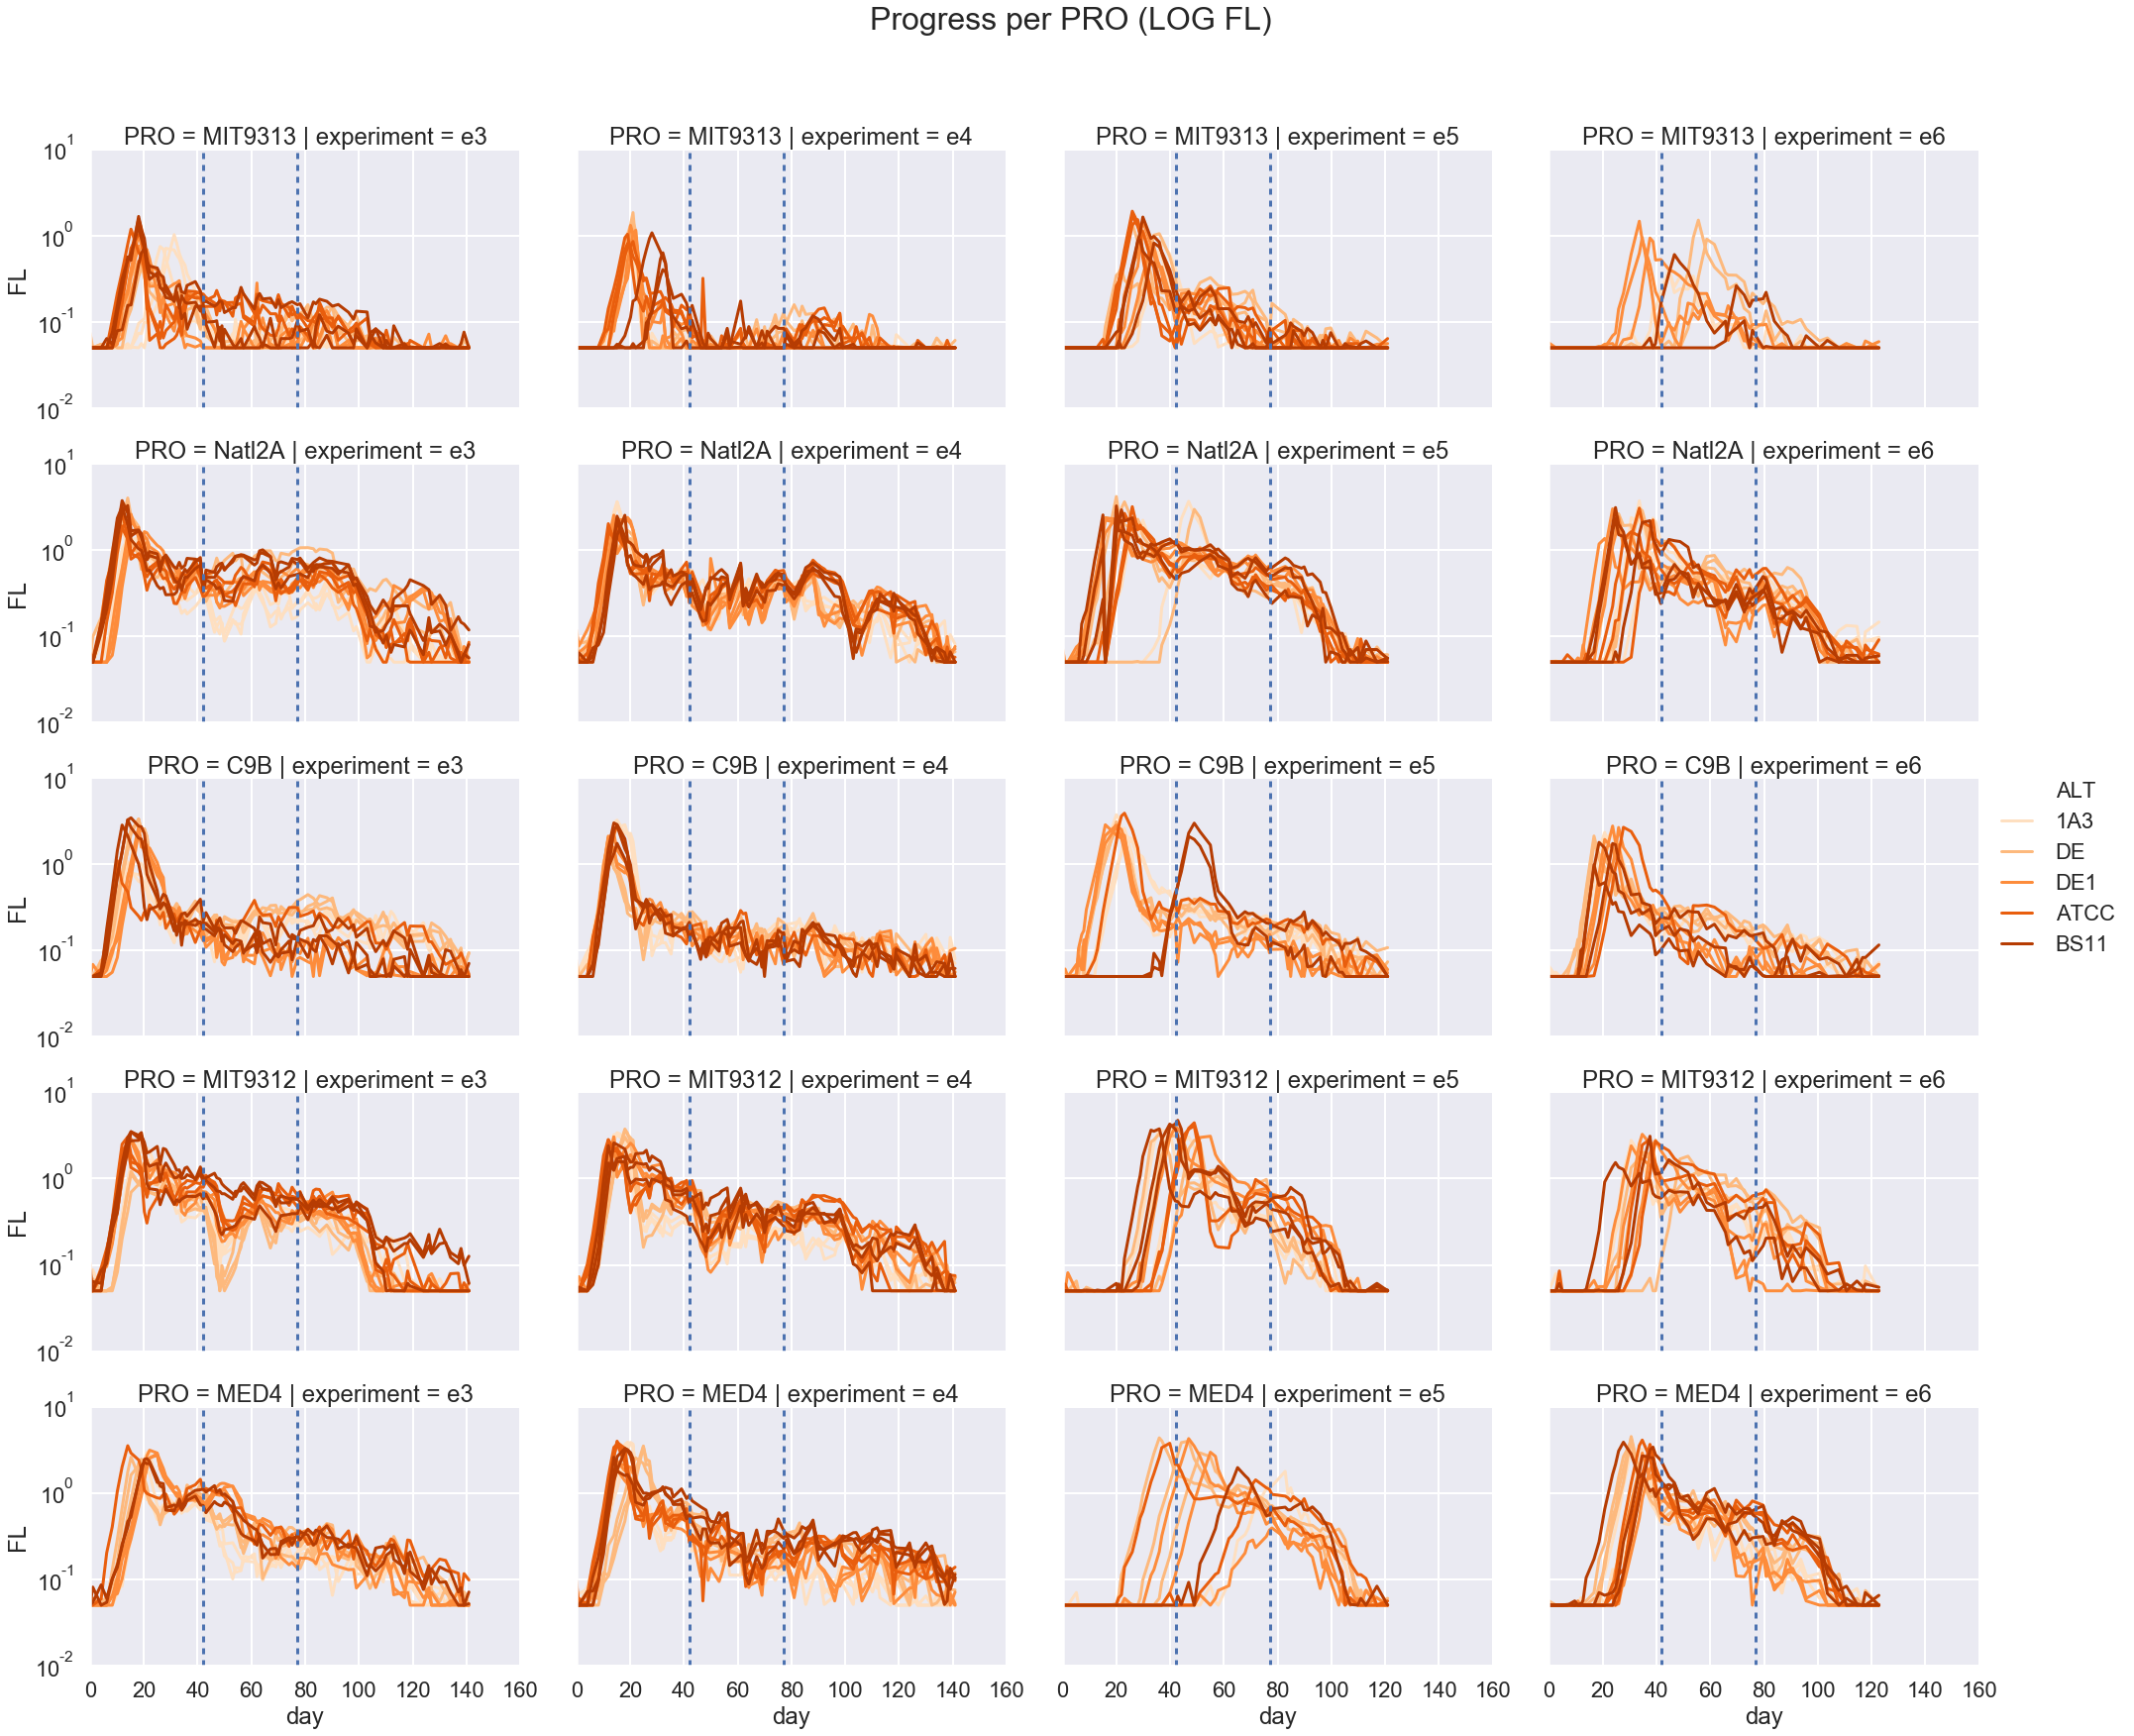

In [10]:
a= sns.relplot(data=dfc, x='day', y='FL', kind='line', 
               #ci='sd',
               estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,
            palette=apallete, hue_order=aorder,
            aspect=1.4
           )
a.fig.get_axes()[0].set_yscale('log')
for l in a.axes:
    for ax in l:
        ax.axvline(77, ls='--', label='17')
        ax.axvline(42, ls='--', label='23')
    
plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per PRO (LOG FL)", fontsize=32)
plt.show()


# TSFRESH features 

In [18]:
metadf = cp.get_meta(dfc)
metadf.index = metadf.experiment_sample
y= metadf.PRO + ','+ metadf.ALT

y.head()

experiment_sample
e3, 10A      C9B,DE
e3, 10B      C9B,DE
e3, 10C      C9B,DE
e3, 11A    MED4,DE1
e3, 11B    MED4,DE1
dtype: object

In [19]:
extracted_features = tsfresh.extract_relevant_features(
    dfc.loc[:,['experiment_sample', 'day', 'FL', 
       #'logFL', 'cumsumFL', 'cumsumlogFL', 'zscoreFL', 'diffFL', 'difflogFL',
       #'diffday', 'rateFL', 'ratelogFL', 
    ]],
    y,
     column_id='experiment_sample', column_kind=None, 
     column_sort='day', 
     column_value='FL')


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.56it/s]
 'FL__fft_coefficient__coeff_40__attr_"angle"'
 'FL__fft_coefficient__coeff_40__attr_"imag"'
 'FL__fft_coefficient__coeff_40__attr_"real"'
 'FL__fft_coefficient__coeff_41__attr_"abs"'
 'FL__fft_coefficient__coeff_41__attr_"angle"'
 'FL__fft_coefficient__coeff_41__attr_"imag"'
 'FL__fft_coefficient__coeff_41__attr_"real"'
 'FL__fft_coefficient__coeff_42__attr_"abs"'
 'FL__fft_coefficient__coeff_42__attr_"angle"'
 'FL__fft_coefficient__coeff_42__attr_"imag"'
 'FL__fft_coefficient__coeff_42__attr_"real"'
 'FL__fft_coefficient__coeff_43__attr_"abs"'
 'FL__fft_coefficient__coeff_43__attr_"angle"'
 'FL__fft_coefficient__coeff_43__attr_"imag"'
 'FL__fft_coefficient__coeff_43__attr_"real"'
 'FL__fft_coefficient__coeff_44__attr_"abs"'
 'FL__fft_coefficient__coeff_44__attr_"angle"'
 'FL__fft_coefficient__coeff_44__attr_"imag"'
 'FL__fft_coefficient__coeff_44__attr_"real"'
 'FL_

 'FL__fft_coefficient__coeff_99__attr_"real"'] did not have any finite values. Filling with zeros.


In [20]:
extracted_features.shape

(270, 203)

In [21]:
extracted_features.head()

variable,"FL__fft_coefficient__coeff_25__attr_""imag""",FL__ratio_beyond_r_sigma__r_6,"FL__fft_coefficient__coeff_27__attr_""real""",FL__autocorrelation__lag_8,"FL__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0",FL__longest_strike_above_mean,FL__partial_autocorrelation__lag_8,FL__quantile__q_0.1,"FL__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","FL__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0",...,"FL__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_20","FL__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""slope""","FL__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0","FL__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","FL__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4","FL__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","FL__fft_coefficient__coeff_17__attr_""abs""","FL__fft_coefficient__coeff_16__attr_""abs""","FL__fft_coefficient__coeff_29__attr_""abs""","FL__fft_coefficient__coeff_12__attr_""abs"""
id,,,,,,,,,,,,,,,,,,,,,
"e3, 10A",1.149459,0.0,0.759614,-0.124715,0.000227,8.0,-0.186553,0.1150,0.000662,0.021083,...,3.298089,-0.517766,0.001761,0.001260,0.179286,0.830299,0.653722,1.280298,0.461446,1.231128
"e3, 10B",1.010519,0.0,0.798260,-0.122970,0.000567,8.0,-0.168491,0.1022,0.001475,0.030417,...,3.267963,-0.520867,0.001611,0.001580,0.180341,0.804142,0.510301,1.092711,0.657630,1.766446
"e3, 10C",0.653288,0.0,0.518555,-0.134379,0.000226,9.0,-0.354271,0.1050,0.000628,0.020100,...,3.155758,-0.488912,0.002341,0.001449,0.169605,0.800854,0.572317,0.614306,0.383031,1.801285
"e3, 11A",-0.038809,0.0,0.037937,0.175252,0.000005,28.0,-0.063560,0.0500,0.000006,0.001000,...,4.389896,-0.405766,0.003588,0.005747,0.153023,1.077665,0.795260,1.733443,0.615700,1.913015
"e3, 11B",-0.156945,0.0,-0.027359,0.187791,0.000046,26.0,-0.237303,0.0500,0.000073,0.005250,...,4.849092,-0.533560,0.001191,0.001504,0.179317,1.088647,0.805451,0.972723,0.430142,2.000209


In [22]:
clf = cp.forest_classifier(X=extracted_features, y=y)

0.48148148148148145


accuracy: 0.48148148148148145


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

     C9B,1A3       0.50      0.92      0.65        12
    C9B,ATCC       0.00      0.00      0.00         4
    C9B,BS11       1.00      0.45      0.62        11
      C9B,DE       0.71      0.83      0.77        12
     C9B,DE1       0.52      1.00      0.69        12
    MED4,1A3       0.50      0.10      0.17        10
   MED4,ATCC       0.00      0.00      0.00         9
   MED4,BS11       0.00      0.00      0.00         9
     MED4,DE       0.23      1.00      0.38        12
    MED4,DE1       0.43      0.50      0.46        12
 MIT9312,1A3       0.00      0.00      0.00        12
MIT9312,ATCC       0.00      0.00      0.00        10
MIT9312,BS11       1.00      0.55      0.71        11
  MIT9312,DE       0.50      0.50      0.50        12
 MIT9312,DE1       0.00      0.00      0.00        11
 MIT9313,1A3       0.88      0.78      0.82         9
MIT9313,ATCC       0.69      1.00      0.82         9
MIT9313,BS11       0.86    

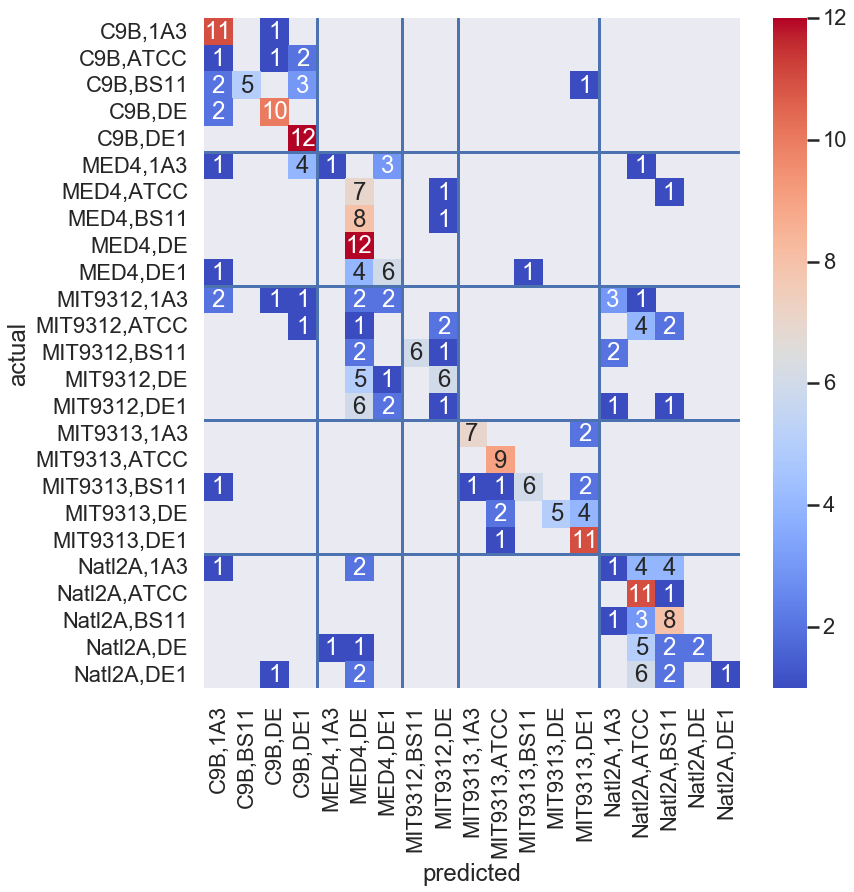

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=extracted_features, y=y, ax=ax)
ax.axhline(5)
ax.axhline(15)
ax.axhline(20)
ax.axhline(10)
ax.axvline(4)
ax.axvline(7)
ax.axvline(9)
ax.axvline(14)

accuracy: 0.774074074074074
              precision    recall  f1-score   support

         C9B       0.78      0.98      0.87        51
        MED4       0.60      0.79      0.68        52
     MIT9312       0.89      0.29      0.43        56
     MIT9313       0.96      0.98      0.97        52
      Natl2A       0.76      0.86      0.81        59

   micro avg       0.77      0.77      0.77       270
   macro avg       0.80      0.78      0.75       270
weighted avg       0.80      0.77      0.75       270



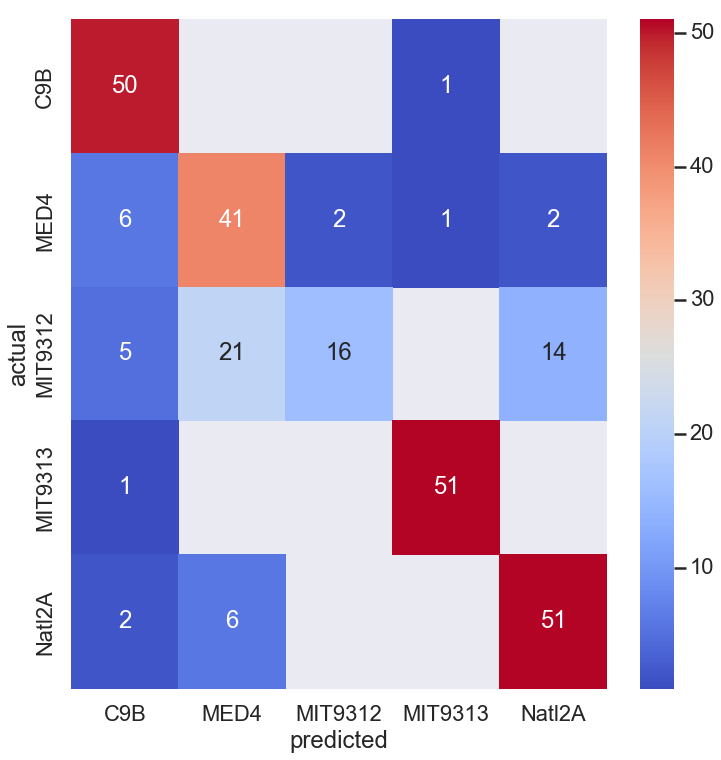

In [28]:
func = lambda x : x.str.split(',', expand=True)[0]
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=extracted_features, y=y, ax=ax, func=func)

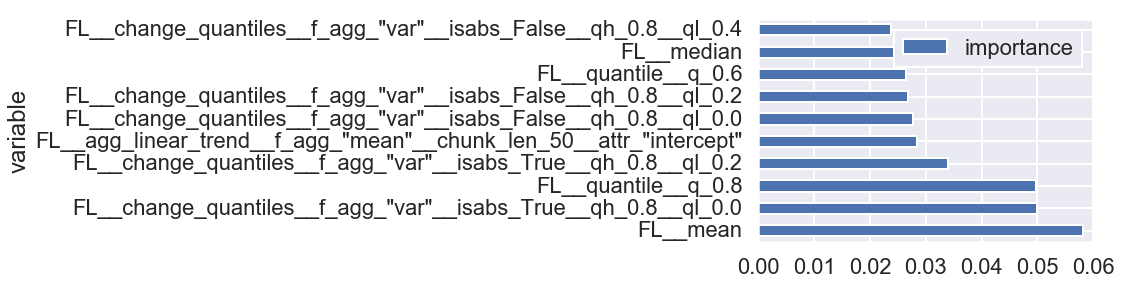

In [29]:
cp.forest_feature_importance(clf, extracted_features.columns)

In [7]:
g = cp.generate_features(dfc)

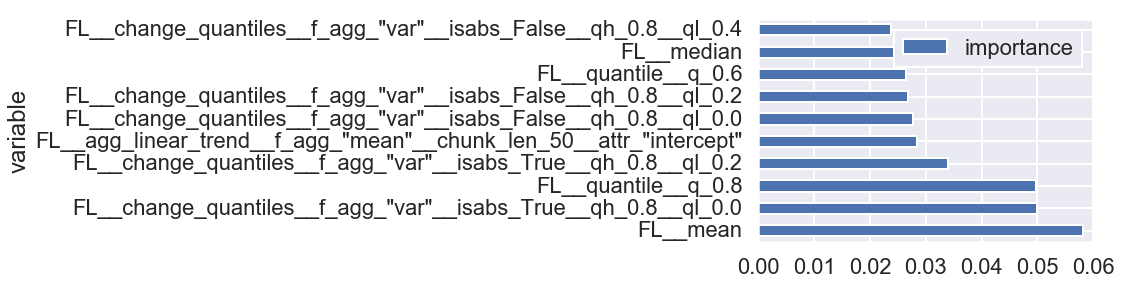

In [24]:
cp.forest_feature_importance(clf=clf, col_names=extracted_features.columns)

# Time Series Resampling

In [50]:
df.head()

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,-2.017406,-0.588889,NaN,NaN,NaN,NaN,NaN,"e1, 1A"
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,-3.856257,-0.575917,0.026,0.178555,0.715972,0.036314,0.249388,"e1, 1A"
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,-5.720587,-0.577913,-0.004,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A"
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,-7.435386,-0.565440,0.025,0.149532,0.905556,0.027607,0.165127,"e1, 1A"
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,-7.894252,-0.339936,0.452,1.255933,3.843056,0.117615,0.326806,"e1, 1A"


In [53]:
df = df.loc[:, ['day', 'experiment', 'sample', 'FL', 'PRO', 'ALT', 'culture', 'experiment_sample'] ]

In [54]:
df.columns

Index(['day', 'experiment', 'sample', 'FL', 'PRO', 'ALT', 'culture',
       'experiment_sample'],
      dtype='object')

In [125]:
def resample_func(df, x_col='day', y_col='FL', period='3d' ):
    t = df
    t.index = pd.to_timedelta(t[x_col], unit='d')
    return t.resample(period).agg({y_col : 'mean'})
    #return t.resample(period).agg({y_col : ['mean', 'median','std']})
    #return t.rolling(period, min_periods=1).agg({y_col : ['mean', 'median','std']})


In [126]:
df_resampled = df.groupby(['experiment_sample', 'experiment', 'sample', 'PRO', 'ALT', 'culture'] ).apply(resample_func)

In [127]:
#df_resampled.columns = ["_".join(x) for x in df_resampled.columns.ravel() ]
df_resampled = df_resampled.reset_index()
df_resampled.dropna(inplace=True)
df_resampled['Variable'] = 'FL'
df_resampled.rename(columns={'FL' : 'Value'}, inplace=True)

In [128]:
df_resampled.head()

,experiment_sample,experiment,sample,PRO,ALT,culture,day,Value,Variable
0,"e1, 10A",e1,10A,C9B,DE,Co_Culture,0 days,0.119500,FL
2,"e1, 10A",e1,10A,C9B,DE,Co_Culture,6 days,0.444000,FL
3,"e1, 10A",e1,10A,C9B,DE,Co_Culture,9 days,1.593500,FL
4,"e1, 10A",e1,10A,C9B,DE,Co_Culture,12 days,4.713667,FL
5,"e1, 10A",e1,10A,C9B,DE,Co_Culture,15 days,3.397000,FL


In [153]:
df_resampled = df_resampled.loc[df_resampled.experiment.isin(['e1', 'e3', 'e4', 'e5', 'e6'])]


In [166]:
X = cp.experiments2X(df_resampled, value_col='Value', cumsummode=False )
X_train = X[X.index.str.startswith('e1') |
             X.index.str.startswith('e3') |
             X.index.str.startswith('e4') |
             X.index.str.startswith('e5') ]
X_test = X[X.index.str.startswith('e6') ]
           

metadf = cp.get_meta(df_resampled, value_col='Value')
metadf.index = metadf.experiment_sample

metadf_train = metadf[metadf.index.str.startswith('e1') |
             metadf.index.str.startswith('e3') |
             metadf.index.str.startswith('e4') |
             metadf.index.str.startswith('e5') ]
metadf_test = metadf[metadf.index.str.startswith('e6') ]

y_train= metadf_train.PRO + ','+ metadf_train.ALT
y_test= metadf_test.PRO + ','+ metadf_test.ALT
clf = cp.forest_classifier(X=X_train, y=y_train)

0.3762057877813505


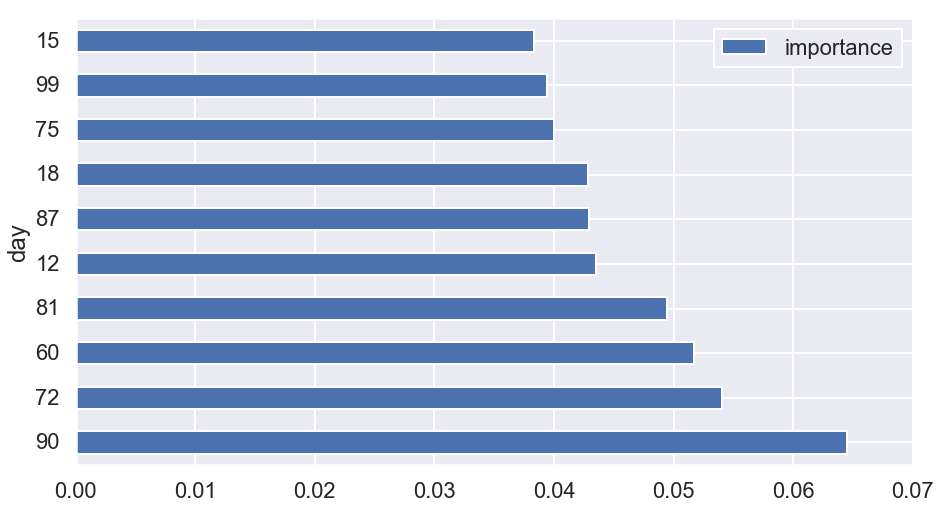

In [168]:
cp.forest_feature_importance(clf, X_train.columns)

accuracy: 0.662379421221865
              precision    recall  f1-score   support

         C9B       0.58      0.71      0.64        52
        MED4       0.92      0.42      0.57        55
     MIT9312       0.63      0.62      0.63        61
     MIT9313       0.75      0.95      0.84        61
      Natl2A       0.58      0.73      0.64        62
         all       0.67      0.33      0.44        12
        allP       1.00      0.12      0.22         8

   micro avg       0.66      0.66      0.66       311
   macro avg       0.73      0.56      0.57       311
weighted avg       0.70      0.66      0.65       311



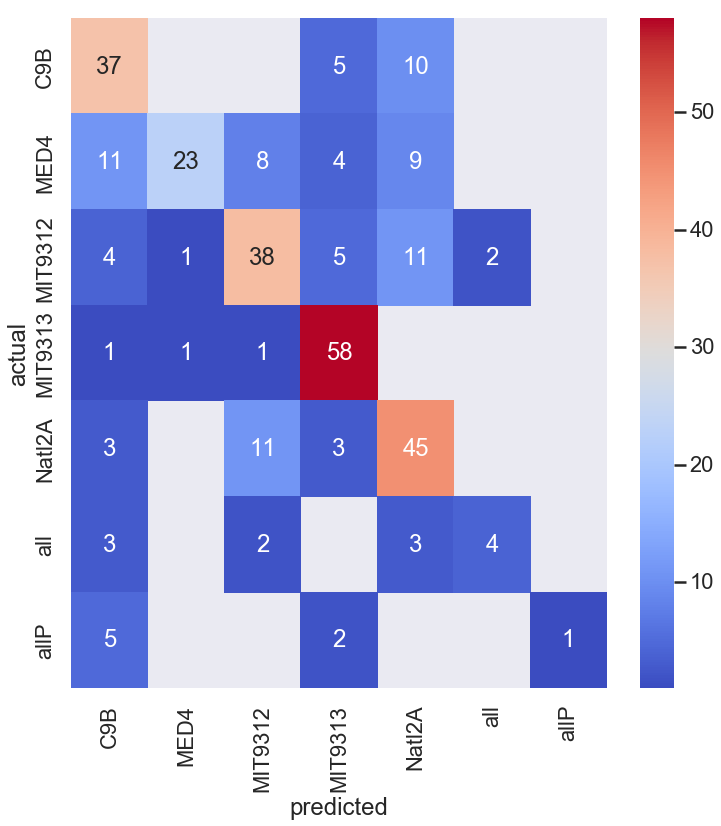

In [169]:
func = lambda x : x.str.split(',', expand=True)[0]
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=X_train, y=y_train, ax=ax, func=func)

accuracy: 0.4714285714285714


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         C9B       0.50      1.00      0.67        13
        MED4       0.00      0.00      0.00        15
     MIT9312       0.36      0.38      0.37        13
     MIT9313       0.70      0.78      0.74         9
      Natl2A       0.47      0.53      0.50        15
         all       0.00      0.00      0.00         3
        allP       0.00      0.00      0.00         2

   micro avg       0.47      0.47      0.47        70
   macro avg       0.29      0.39      0.32        70
weighted avg       0.35      0.47      0.39        70



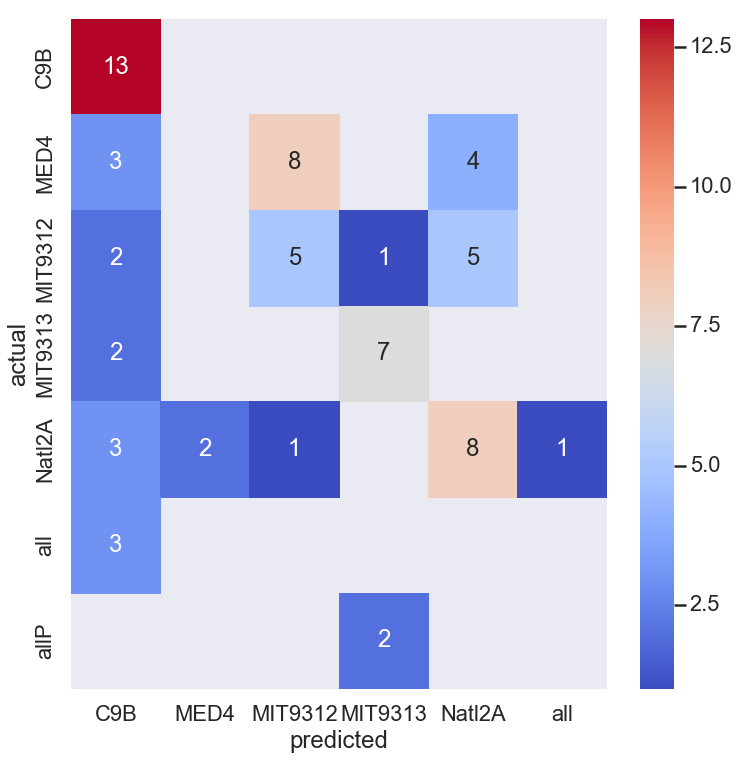

In [170]:
func = lambda x : x.str.split(',', expand=True)[0]
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=X_test, y=y_test, ax=ax, func=func)

In [172]:
X = cp.experiments2X(df_resampled, value_col='Value', cumsummode=False )
X_train = X[X.index.str.startswith('e1') |
             X.index.str.startswith('e3') |
             X.index.str.startswith('e4') |
             X.index.str.startswith('e5') ]
X_test = X[X.index.str.startswith('e6') ]
           

metadf = cp.get_meta(df_resampled, value_col='Value')
metadf.index = metadf.experiment_sample

metadf_train = metadf[metadf.index.str.startswith('e1') |
             metadf.index.str.startswith('e3') |
             metadf.index.str.startswith('e4') |
             metadf.index.str.startswith('e5') ]
metadf_test = metadf[metadf.index.str.startswith('e6') ]

y_train= metadf_train.PRO  #+ ','+ metadf_train.ALT
y_test= metadf_test.PRO # + ','+ metadf_test.ALT
clf = cp.forest_classifier(X=X_train, y=y_train)

0.594855305466238


accuracy: 0.594855305466238


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         C9B       0.60      0.62      0.61        52
        MED4       0.77      0.18      0.29        55
     MIT9312       0.56      0.62      0.59        61
     MIT9313       0.72      1.00      0.84        61
      Natl2A       0.48      0.71      0.57        62
         all       0.00      0.00      0.00        12
        allP       0.00      0.00      0.00         8

   micro avg       0.59      0.59      0.59       311
   macro avg       0.45      0.45      0.41       311
weighted avg       0.58      0.59      0.55       311



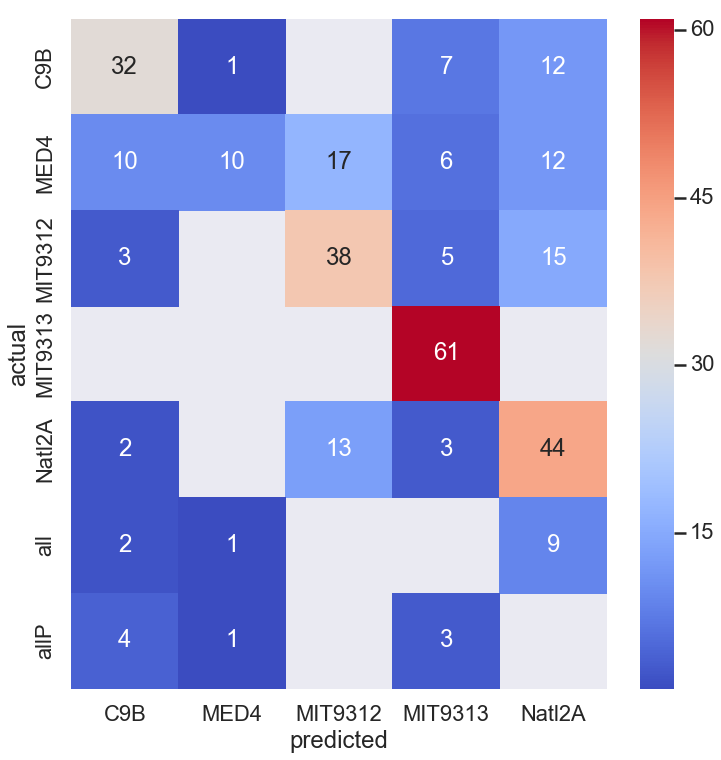

In [174]:
func = lambda x : x.str.split(',', expand=True)[0]
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=X_train, y=y_train, ax=ax) #, func=func)

accuracy: 0.4714285714285714


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         C9B       0.48      0.77      0.59        13
        MED4       0.00      0.00      0.00        15
     MIT9312       0.36      0.69      0.47        13
     MIT9313       0.50      0.67      0.57         9
      Natl2A       0.67      0.53      0.59        15
         all       0.00      0.00      0.00         3
        allP       0.00      0.00      0.00         2

   micro avg       0.47      0.47      0.47        70
   macro avg       0.29      0.38      0.32        70
weighted avg       0.36      0.47      0.40        70



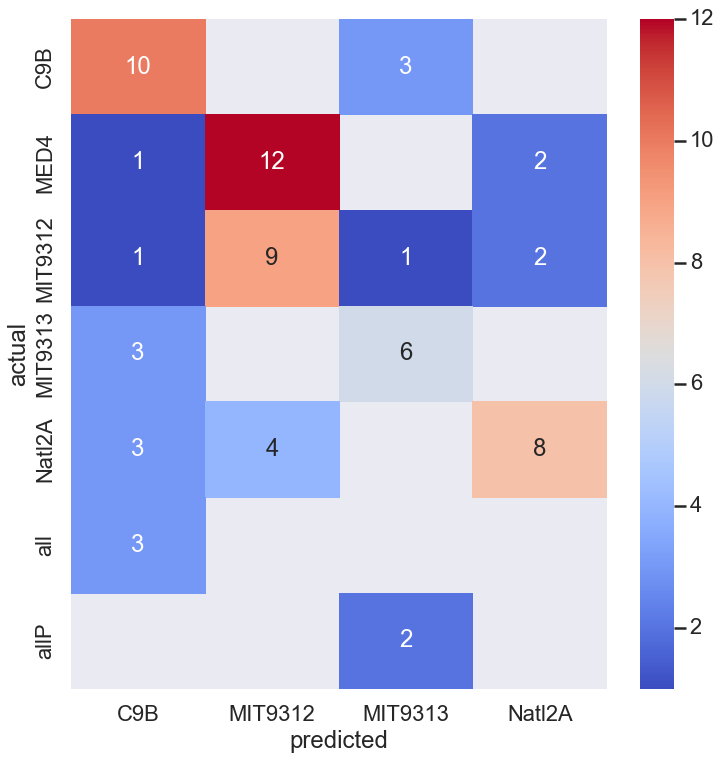

In [173]:
func = lambda x : x.str.split(',', expand=True)[0]
fig, ax = plt.subplots(figsize=(12,12))
cp.forest_heatmap(clf=clf, X=X_test, y=y_test, ax=ax) #, func=func)

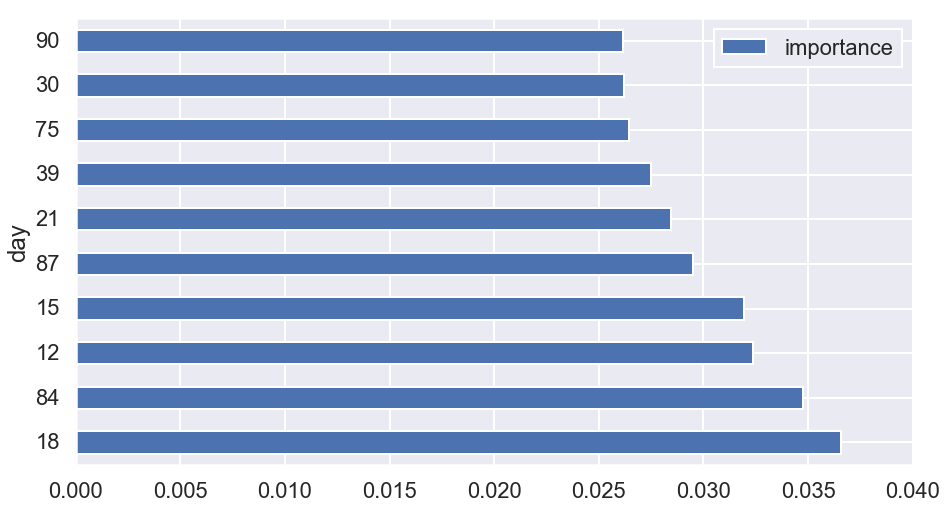

In [266]:
cp.forest_feature_importance(clf, X_train.columns)

In [265]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [101]:
df_resampled_3d = df.groupby(['experiment_sample', 'experiment', 'sample', 'PRO', 'ALT', 'culture'] 
                            ).apply(lambda x: resample_func(x, period='3d'))
df_resampled_3d.columns = ["_".join(x) for x in df_resampled_3d.columns.ravel() ]
df_resampled_3d = df_resampled_3d.reset_index()


# Compare Models

In [12]:
# compare models based on different experiment features
# value_col, 

value_col_list = ['FL', 'logFL', 'cumsumFL', 'cumsumlogFL', 'zscoreFL', 'rateFL', 'ratelogFL'],
resample_period_list = [None, '1d', '3d', '5d']
y_col_list = ['PRO', 'ALT', 'PRO_ALT']
cumsummode_list = [False, True]

In [13]:
# compare models based on different experiment features
# value_col, 

value_col_list = ['FL'],
resample_period_list = [None, '1d']
y_col_list = ['PRO']
cumsummode_list = [False, True]

In [14]:
def compare_models(df, value_col, resample_period_list, y_col_list, cumsummode_list):
    # resample first
    stats_list = []
    for resample_period in resample_period_list:
        if resample_period is not None:
            d = cp.resample_df(df, value_col=value_col, period=resample_period)
        else:
            d = df
        metadf = cp.get_meta(d, value_col=value_col)
        for cumsummode in cumsummode_list:
            X = cp.experiments2X(d, value_col=value_col, cumsummode=cumsummode)
            
            resample_str = '_' + resample_period if resample_period is not None else ''
            cumsummode_str = '_cumsum' if cumsummode else ''
            for y_col in y_col_list:
                modelname = f'{y_col}_{value_col}{resample_str}{cumsummode_str}'
                clf, res, _ = cp.ml(X=X, metadf=metadf, modelname=modelname, y_col=y_col)
                stats_list.append(res)
    return stats_list
            

In [1]:
stats_list = compare_models(dfw, value_col='FL', 
               resample_period_list=[None], 
               y_col_list=['PRO'], 
               cumsummode_list=[False])


NameError: name 'compare_models' is not defined

In [260]:
import sklearn.metrics as metrics

def _calc_score_for_one_type(res, y_true, y_pred, suffix):
    precision, recall, f1, support = metrics.precision_recall_fscore_support(
        y_true= y_true,
        y_pred = y_pred,
        average='weighted'
    )
    res[f'accuracy_{suffix}'] = metrics.accuracy_score(y_true=y_true, y_pred=y_pred)
    res[f'precision_{suffix}'] = precision
    res[f'recall_{suffix}'] = recall
    res[f'f1_{suffix}'] = f1
    res[f'support_{suffix}'] = support
    

def score_model(modelname, clf, X_train, y_train, X_test, y_test):
    func = lambda x : x.str.split(',', expand=True)[0]
    scalar = StandardScaler()
    scaledX_train = scalar.fit_transform(X_train)
    scaledX_test  = scalar.transform(X_test)
    
    y_train_pred = clf.predict(scaledX_train)
    y_test_pred  = clf.predict(scaledX_test)
    

    y_train_pro = func(y_train)
    y_test_pro = func(y_test)
    y_train_pred_pro = func(pd.Series(y_train_pred, index=y_train.index))
    y_test_pred_pro = func(pd.Series(y_test_pred, index=y_test.index))
    
    res = {'model': modelname}
    res['oob_score'] = clf.oob_score_ 
    _calc_score_for_one_type(res, y_true=y_train, y_pred=y_train_pred, suffix='train')
    _calc_score_for_one_type(res, y_true=y_test, y_pred=y_test_pred, suffix='test')
    _calc_score_for_one_type(res, y_true=y_train_pro, y_pred=y_train_pred_pro, suffix='train_PRO')
    _calc_score_for_one_type(res, y_true=y_test_pro, y_pred=y_test_pred_pro, suffix='test_PRO')
    
    y_train_df = pd.DataFrame(data={
        f'{modelname}_y' : y_train,
        f'{modelname}_y_PRO' : y_train_pro,
        f'{modelname}_y_pred' : y_train_pred,
        f'{modelname}_y_pred_PRO' : y_train_pred_pro,
    }, index=y_train.index)
    y_train_df['Type'] = 'Train'
    y_test_df = pd.DataFrame(data={
        f'{modelname}_y' : y_test,
        f'{modelname}_y_PRO' : y_test_pro,
        f'{modelname}_y_pred' : y_test_pred,
        f'{modelname}_y_pred_PRO' : y_test_pred_pro,
    }, index=y_test.index)
    y_test_df['Type'] = 'Test'
    y_df = pd.concat([y_train_df, y_test_df])        
    return clf, res, y_df
    

In [261]:
import sklearn.metrics as metrics

def ml(X, metadf, modelname):
    X_train = X[X.index.str.startswith('e1') |
                 X.index.str.startswith('e3') |
                 X.index.str.startswith('e4') |
                 X.index.str.startswith('e5') ]
    X_test = X[X.index.str.startswith('e6') ]

    metadf.index = metadf.experiment_sample
    metadf_train = metadf[metadf.index.str.startswith('e1') |
                 metadf.index.str.startswith('e3') |
                 metadf.index.str.startswith('e4') |
                 metadf.index.str.startswith('e5') ]
    metadf_test = metadf[metadf.index.str.startswith('e6') ]

    y_train= metadf_train.PRO  + ','+ metadf_train.ALT
    y_test= metadf_test.PRO + ','+ metadf_test.ALT
    clf = cp.forest_classifier(X=X_train, y=y_train)
    return (modelname, clf, X_train, y_train, X_test, y_test)
    
    return score_model(modelname, clf, X_train, y_train, X_test, y_test)


1. make X y 
2. split to train and test
3. fit
4. report
     scores on train (accuracy, precision, recall)
     oob score
     scores on test
     